In [ ]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt 

import datetime 
import warnings
warnings.filterwarnings('ignore')

!git clone https://github.com/youssefantoury/EtherDescent.git

%cd EtherDescent

path_to_data = 'eth-usdt.csv'
data = pd.read_csv("eth-usdt.csv", sep=',', infer_datetime_format=True, parse_dates={'datetime':[0]}, index_col=['datetime']) #what to do about closing time ? delete/drop  ? yes // one of the challenge

data.drop(data.columns[[5,10]], axis=1, inplace=True)

#data.loc[datetime.datetime(year=2020,month=4,day=29)] 

data = data.astype('float32') # attention to not change the objects,


#data_remove = data.dropna()

daily_data = data.resample('D', level=0).sum()/48

avgValues = np.zeros((1133,1),dtype="float32")

for i in range (0,1133) :
  avgValues[i]=((daily_data['High'][i]+daily_data['Low'][i])/2) 
  
daily_data.insert(9,'AvgValues', avgValues )

daily_data.drop(daily_data.tail(1).index,inplace=True)

value=[1560,1590,1620,1575,1625,1704]
lastdate= datetime.datetime(2022, 9, 3)
for i in range (0,6):
  lastdate += datetime.timedelta(days=1)
  arr=np.array([0,0,0,0,0,0,0,0,0,value[i]])
  daily_data.loc[lastdate]=arr


#daily_data.head(1133)
daily_data.iloc[795]
data.head()

Cloning into 'EtherDescent'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.
/content/EtherDescent


,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume
datetime,,,,,,,,,
2019-07-30 00:00:00,210.839996,211.789993,210.630005,210.649994,1830.974121,386708.65625,1679.0,1025.798950,216674.578125
2019-07-30 00:30:00,210.649994,210.809998,210.199997,210.259995,1601.313477,337120.25000,1905.0,811.067139,170774.312500
2019-07-30 01:00:00,210.259995,210.320007,208.399994,208.399994,2620.531250,548495.12500,2706.0,1230.693115,257681.218750
2019-07-30 01:30:00,208.460007,209.289993,208.009995,208.059998,2819.704346,588587.87500,2501.0,1428.370361,298200.406250
2019-07-30 02:00:00,208.059998,208.960007,207.259995,208.190002,3643.233398,758269.87500,2793.0,1770.710571,368558.406250


In [ ]:
daily_data.head(1134)

,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,AvgValues
datetime,,,,,,,,,,
2019-07-30,209.124374,209.778122,208.567078,209.099991,4639.245605,9.713977e+05,2688.395752,2635.730469,5.519243e+05,209.172607
2019-07-31,213.910629,214.685196,213.437500,214.092087,4316.949219,9.253466e+05,2561.895752,2335.060791,5.003183e+05,214.061340
2019-08-01,214.359573,214.814377,213.771255,214.331863,3891.795654,8.344792e+05,2435.812500,1913.535767,4.104563e+05,214.292816
2019-08-02,217.811661,218.348328,217.216446,217.823959,4309.729980,9.399312e+05,2574.395752,2245.724365,4.899948e+05,217.782379
2019-08-03,221.821671,222.408127,221.249588,221.911057,3783.165771,8.392862e+05,2305.395752,1955.689087,4.338803e+05,221.828857
...,...,...,...,...,...,...,...,...,...,...
2022-09-01,1558.028809,1566.156738,1550.316284,1558.697754,15181.468750,2.360879e+07,24900.603516,7556.168457,1.175243e+07,1558.236572
2022-09-02,1592.843628,1599.764282,1585.176880,1592.617554,19146.033203,3.066366e+07,24184.541016,9698.657227,1.553523e+07,1592.470581
2022-09-03,1557.305298,1561.287231,1552.144897,1556.931763,6695.775391,1.041786e+07,11726.937500,3340.875000,5.198778e+06,1556.716064


Text(0, 0.5, 'Number of Trades')

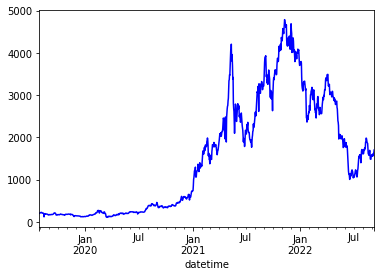

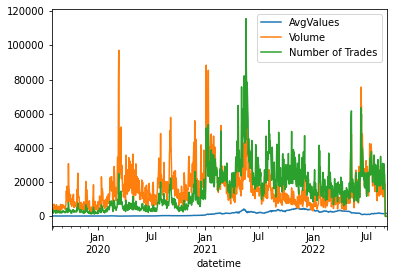

<Figure size 432x288 with 0 Axes>

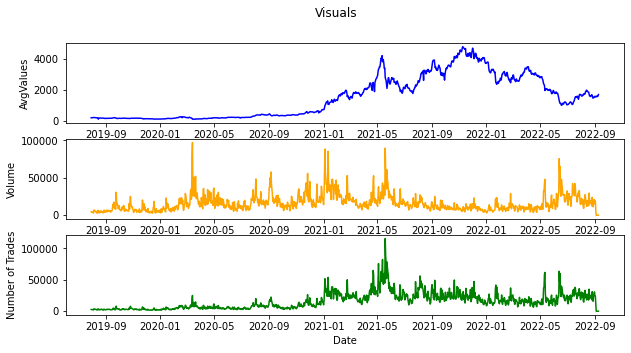

In [ ]:
daily_data_meter_1 = daily_data['AvgValues']
daily_data_meter_2 = daily_data['Volume']
daily_data_meter_3 = daily_data['Number of Trades']

daily_data_meter_1.plot(color="blue") # can plot directly in pandas

# Can plot them all in one figure directly from pandas
daily_data_per_meter = daily_data[['AvgValues','Volume','Number of Trades']]
daily_data_per_meter.plot()

# Using matplotlib
plt.figure()                # the first figure
plt.figure(figsize=(10,5))  # define figure size (rows, cols)
plt.suptitle('Visuals')

plt.subplot(311)             # the first subplot in the first figure
plt.plot(daily_data['AvgValues'],color="blue")
plt.xlabel('Date')
plt.ylabel('AvgValues')

plt.subplot(312)             # the second subplot in the first figure
plt.plot(daily_data['Volume'],color="orange")
plt.xlabel('Date')
plt.ylabel('Volume')

plt.subplot(313)             # the third subplot in the first figure
plt.plot(daily_data['Number of Trades'],color="green")
plt.xlabel('Date')
plt.ylabel('Number of Trades')


In [ ]:

# The first and last days in the data are:
daily_data.iloc[[0]] # first day

daily_data.iloc[[-1]] # last day

daily_data.iloc[[4]] # First day for us

daily_data.iloc[[-1]] # Last day for us 

#trainPercentage=int((((1127-4)/7)*70/100)*7)
#testPercentage=int(30*((1133-4)/7)*7/100)

#1127=161*7 161 is number of weeks from sat 3 august 2019 to sept sat 3 2022 & 1127 is the nb of days between the 2 days
#70% of the 161 weeks is 112,... = 112 and 112*7=784  //113*7=791
#30% of the 161 is 48  48*7=336

data = daily_data.values#return numpy array 
train, test = data[3:791+3], data[791+3:-1] # Important numbers (ignoring the lingering days that don't fit into our Monday-Sunday structure)


# reshape into windows of weekly data (one week = 7 days) (total days / 7 = total weeks)
train =np.array(np.array_split(train, len(train)/7))
test =np.array(np.array_split(test, len(test)/7))


# check shape
print(f"The training set is {train.shape} and the test set is {test.shape}.")

#[Input], [Output]
#[d01, d02, d03, d04, d05, d06, d07], [d08, d09, d10, d11, d12, d13, d14]
#[d02, d03, d04, d05, d06, d07, d08], [d09, d10, d11, d12, d13, d14, d15]
#Etc ...

# flatten the train data over all weeks 
train = train.reshape((train.shape[0]*train.shape[1], train.shape[2])) # shape: [weeks*days, sensors]
# check shape
train.shape

# flatten the test data over all weeks 
test = test.reshape((test.shape[0]*test.shape[1], test.shape[2])) # shape: [weeks*days, sensors]
# check shape
test.shape

def supervised_setup(data, column):
  # data: expects train/test set with 2 dimensions of (samples, features)- i.e. one sensor reading
  # column: expects integer indicating column number of meter of interest`- thecolumn index that interest us

  X, y = [], [] # start with empty lists for X and y
  input_start = 0 # iterator
  n_input = 7 # we want 7 days as input
  n_out = 7 # we want 7 days as output

  # step over the entire history one time step at a time
  for i in range(len(data)):# in 1133
    # define the end of the input and corresponding output
    input_end = input_start + n_input
    output_end = input_end + n_out	
    # ensure we have enough data for this instance
    if output_end < len(data):	
      x_input = data[input_start:input_end, column]	#all columns except avgValue need better algorithm to choose all columns except 'column' parameter , but we know it so no prob 
      x_input = x_input.reshape((len(x_input), 1))
      X.append(x_input)	
      y.append(data[input_end:output_end, column])

      # move along one time step
      input_start += 1

  return np.array(X), np.array(y)





The training set is (128, 7, 10) and the test set is (34, 7, 10).


In [ ]:

#make input and output data for training and testing
X_train, y_train = supervised_setup(train, 9)
X_test, y_test = supervised_setup(test, 9)

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# let's define some parameters for our LSTM model
n_inputs, n_channels, n_outputs = X_train.shape[1], X_train.shape[2], X_train.shape[1]# now = 7,9,7    // before modification on supervised_setup:  #7, 1, 7 #channels is input feature dimension ex rgb in cnn , 3 channels , here 1 but we need 9 <=> all columns except value
n_cells, n_neurons = 64, 32

# build the network archiecture
model = Sequential()
model.add(LSTM(n_cells, activation='relu', input_shape=(n_inputs, n_channels),return_sequences=True)) # set return_sequences=True to add new LSTM layer  
#model.add(LSTM(n_cells, activation='relu', return_sequences=True))
#model.add(LSTM(n_cells, activation='relu', return_sequences=True))
model.add(LSTM(n_cells,activation='relu'))
model.add(Dense(n_neurons, activation='relu'))
#model.add(Dense(n_neurons, activation='relu'))
model.add(Dense(n_outputs))

# compile the model
# we define the mean squared error as an evaluation metric for training & define ADAM as an optimization algorithm 
model.compile(loss='mse', optimizer='adam')#mean squared error, beacuse pridiction/regression problem 
	
# train the network
model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=0)

#[Input], [Output]
#[d01, d02, d03, d04, d05, d06, d07], [d08, d09, d10, d11, d12, d13, d14]
#[d02, d03, d04, d05, d06, d07, d08], [d09, d10, d11, d12, d13, d14, d15]
#Etc ...






In [ ]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 7, 64)             16896     
                                                                 
 lstm_7 (LSTM)               (None, 64)                33024     
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 7)                 231       
                                                                 
Total params: 52,231
Trainable params: 52,231
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# make a single prediction
def forecast(model, history, n_input):
	# flatten data
	data = np.array(history)
	data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))

 
  # retrieve last observations for input data
	input_x = data[-n_input:]
	
  # reshape into [1, n_input, 1]
	input_x = input_x.reshape((1, len(input_x), 1))
	
  # forecast the next week
	predicted_y = model.predict(input_x, verbose=0)
	#print(predicted_y)
  # we only want the vector forecast
	predicted_y = predicted_y[0]
	return predicted_y

# To start evaluating our model, we can start from the last week in our training data
history = [x for x in X_train] # converting history into a list
n_input = 7

# We do walk-forward validation for each week
predictions = []
	
for i in range(len(X_test)):
	# predict the week
	y_predicted = forecast(model, history, n_input) 
	# collect predictions
	predictions.append(y_predicted)
	# get real observation and add it to my history 
	history.append(X_test[i,:])
 

[[3835.3667 3878.6045 3787.02   3833.713  3760.6633 3755.18   3713.1501]]
[[3265.97   3303.132  3215.8525 3270.8066 3199.6516 3197.4102 3159.5237]]
[[3201.4062 3235.8674 3145.084  3208.1746 3135.1675 3131.4917 3094.3047]]
[[3101.6372 3131.3118 3036.3882 3108.4329 3037.731  3028.6597 2991.2627]]
[[2963.183  2990.2603 2895.7117 2971.793  2901.5378 2893.0898 2855.04  ]]
[[2744.408  2768.7598 2678.1252 2759.923  2681.8901 2682.4763 2648.1172]]
[[2593.3667 2617.484  2533.1287 2612.333  2530.9539 2538.5989 2507.7454]]
[[2556.8547 2586.8223 2506.523  2572.3674 2498.5762 2505.5532 2473.827 ]]
[[2499.727  2531.1924 2460.4668 2507.624  2447.1729 2449.7654 2419.9014]]
[[2494.5972 2522.913  2462.2837 2494.756  2446.023  2443.1074 2415.4817]]
[[2515.881  2545.94   2486.312  2514.8555 2467.9836 2465.0432 2436.4512]]
[[2509.9766 2539.3594 2483.2598 2509.2092 2461.1453 2460.658  2433.846 ]]
[[2555.299  2584.4219 2527.5808 2553.86   2505.828  2504.1653 2477.3394]]
[[2623.4607 2655.0972 2597.8025 2620.1

[AVG] ['sat', 'sun', 'mon', 'tue', 'wed', 'thu', 'fri']: 
 [287.325] [227.8092508479492, 268.60411405482773, 264.93211661207397, 301.3190639307828, 302.18449809684, 317.35637492955277, 329.0677076535352]


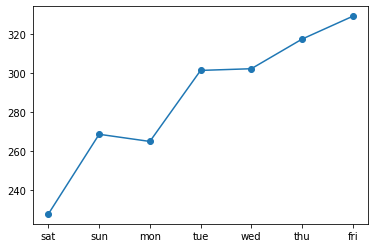

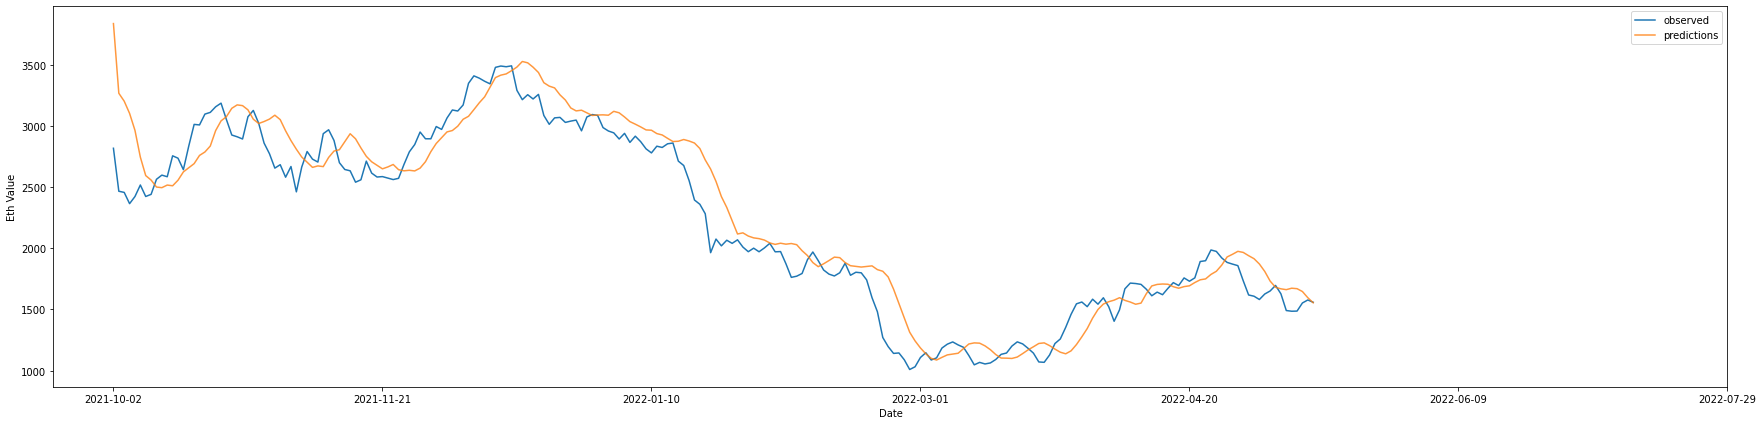

In [ ]:
##########################################
from sklearn.metrics import mean_squared_error

# Now, we want to evaluate our model
predictions = np.array(predictions) # converting from list to np.array

# But we want to see how well our model is doing day by day 
scores = []
# calculate an RMSE score for each day
for i in range(y_test.shape[1]): # Loop over the days of each week (shape[1] refers to the days)
  # calculate mse for each day
  mse = mean_squared_error(y_test[:, i], predictions[:, i])
  rmse = np.sqrt(mse)
	# store
  scores.append(rmse)
 
# calculate overall RMSE for the entire week
weekly_score = np.array(scores).mean()

# print and plot scores
days = ['sat', 'sun', 'mon', 'tue', 'wed', 'thu', 'fri']
print('[AVG] %s: \n [%.3f] %s' % (days, weekly_score, scores))

plt.plot(days, scores, marker='o', label='lstm')
plt.show()

# storing observations and model outputs in dataframes
true = pd.DataFrame(y_test[:,0]) 
pred = pd.DataFrame(predictions[:,0])

dti = pd.date_range(start='2021-10-02', end='2022-09-08', freq='D') # first day of test samples: 2022-01-18 for 80% training data, 2021-09-25 for 70% actually 2021-10-02
ax = true.plot()
pred.plot(ax=ax, alpha=.8, figsize=(30, 7))


xi = list(range(len(dti)))
plt.xticks(np.arange(min(xi), max(xi), 50), dti.date[np.arange(min(xi), max(xi), 50)])

ax.set_xlabel('Date')
ax.set_ylabel('Eth Value')
plt.legend(['observed','predictions'])
plt.show()